# Lung Cancer Prediction Using Voting Classifier

**AIM:** 

This project is aimed at analysing the factors that can contribute to the increase in the risk of getting lung cancer, predicting whether or not a patient is at the risk of lung cancer through various classification algorithms, and thereafter, employing an Ensembler, precisely, Voting Classifier to combine these classification algorithms and output a better result.

![title](Pictures\lung_cancer.jpg)

**By: Nwuguru Chidiebere Sullivan**

## Importing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 12)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from imblearn.under_sampling import RandomUnderSampler 
import warnings
warnings.filterwarnings('ignore')

## Load and view the dataset

In [2]:
lc_df = pd.read_csv('Desktop/CSV Files/lung_cancer.csv')
lc_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
lc_df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


## Understanding Our Dataset

In [4]:
#view the shape of the dataset
lc_df.shape

(309, 16)

In [5]:
#get the general info about the dataset
lc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
#get the descriptive statistics of the numerical variables
lc_df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [7]:
#get the descriptive statistics of the object variables
round(lc_df.describe(exclude=['int64']),2)

,GENDER,LUNG_CANCER
count,309,309
unique,2,2
top,M,YES
freq,162,270


In [8]:
#get the names of all the columns
lc_df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [9]:
#check for unique values in all the columns
columns = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']
unique_values = []

for column in columns:
    unique_values = lc_df[column].unique()
    print(f"Unique_values for {column}:{unique_values}")

Unique_values for GENDER:['M' 'F']
Unique_values for AGE:[69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46]
Unique_values for SMOKING:[1 2]
Unique_values for YELLOW_FINGERS:[2 1]
Unique_values for ANXIETY:[2 1]
Unique_values for PEER_PRESSURE:[1 2]
Unique_values for CHRONIC DISEASE:[1 2]
Unique_values for FATIGUE :[2 1]
Unique_values for ALLERGY :[1 2]
Unique_values for WHEEZING:[2 1]
Unique_values for ALCOHOL CONSUMING:[2 1]
Unique_values for COUGHING:[2 1]
Unique_values for SHORTNESS OF BREATH:[2 1]
Unique_values for SWALLOWING DIFFICULTY:[2 1]
Unique_values for CHEST PAIN:[2 1]
Unique_values for LUNG_CANCER:['YES' 'NO']


In [10]:
#let's replace 2,1 with 0,1 in the numeric columns for easier understanding
columns = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']
for col in columns:
    lc_df[col] = lc_df[col].replace([1,2], [0,1])

In [11]:
lc_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


## Data Wrangling

### check for missing values:

In [12]:
lc_df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

**Observation: There is no missing value**

### check for duplicates:

In [13]:
lc_df.duplicated().sum()

33

**Observation: There are 33 duplicates**

In [14]:
#drop the duplicates
lc_df = lc_df.drop_duplicates()
lc_df.duplicated().sum()

0

**Observation: We've now taken care of the duplicates**

### check for correlation:

In [15]:
correlation = lc_df.corr()
correlation

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
AGE,1.000000,-0.073410,0.025773,0.050605,0.037848,-0.003431,0.021606,0.037139,0.052803,0.052049,0.168654,-0.009189,0.003199,-0.035806
SMOKING,-0.073410,1.000000,-0.020799,0.153389,-0.030364,-0.149415,-0.037803,-0.030179,-0.147081,-0.052771,-0.138553,0.051761,0.042152,0.106984
YELLOW_FINGERS,0.025773,-0.020799,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,-0.109959,0.333349,-0.099169
ANXIETY,0.050605,0.153389,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,-0.155678,0.478820,-0.123182
PEER_PRESSURE,0.037848,-0.030364,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,-0.214115,0.327764,-0.074655
CHRONIC DISEASE,-0.003431,-0.149415,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,-0.011760,0.068263,-0.048895
FATIGUE,0.021606,-0.037803,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,0.407027,-0.115727,0.013757
ALLERGY,0.037139,-0.030179,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.018030,-0.037581,0.245440
WHEEZING,0.052803,-0.147081,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.042289,0.108304,0.142846
ALCOHOL CONSUMING,0.052049,-0.052771,-0.273643,-0.152228,-0.132603,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.163370,-0.000635,0.310767


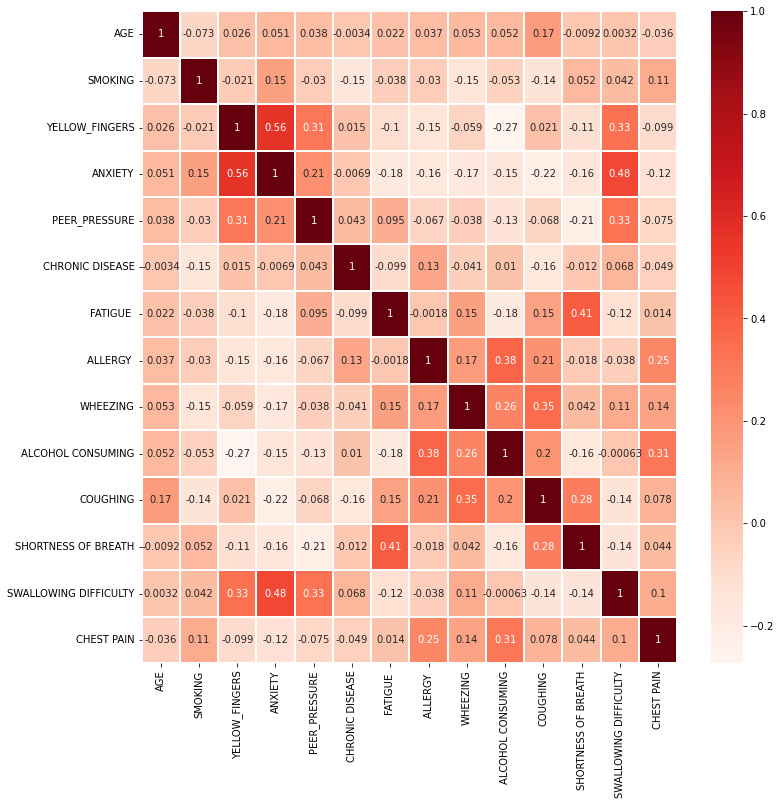

In [16]:
#visualize the correlation
sns.heatmap(correlation, annot=True, cmap='Reds', linewidth=0.1)
plt.show();

**Observation: There are some level of correlation among few of the features, although, not strong enough to be considered**

### let's check for outliers:

We will be checking for outliers across the age column since it is the only column with varying entries unlike the rest of the columns whose entries are mostly binary, i.e. they mainly consist of just two unique entries.

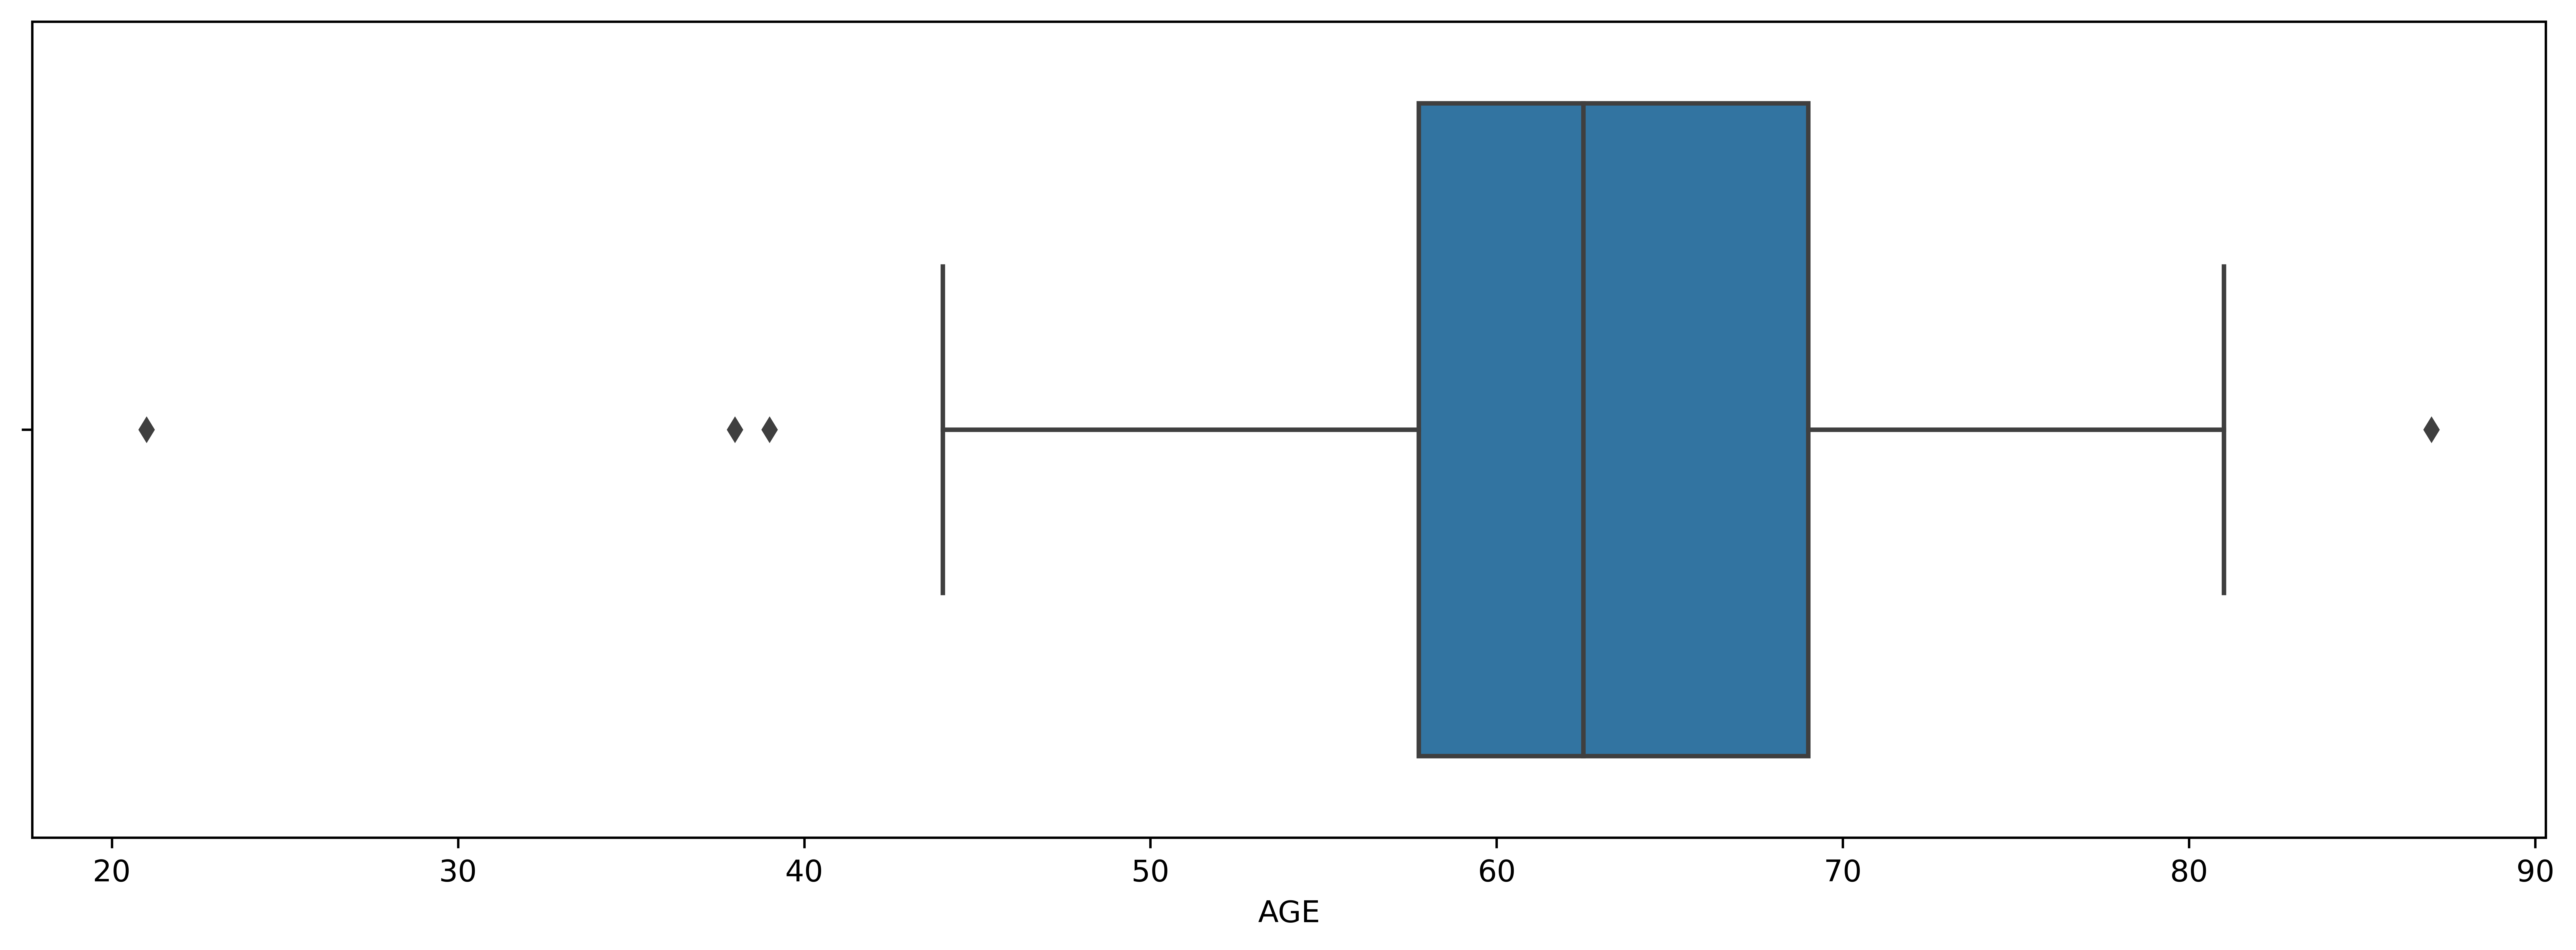

In [29]:
plt.figure(num=None, figsize=(15,5), dpi=800, facecolor='w', edgecolor='k')
sns.boxplot(x='AGE', data=lc_df)
plt.show;

In [45]:
lc_df['AGE'].describe()

count    276.000000
mean      62.909420
std        8.379355
min       21.000000
25%       57.750000
50%       62.500000
75%       69.000000
max       87.000000
Name: AGE, dtype: float64

**Observation: It's very possible to have patients of 21yrs and 87yrs so we will let the outliers be.**

## Exploratory Data Analysis

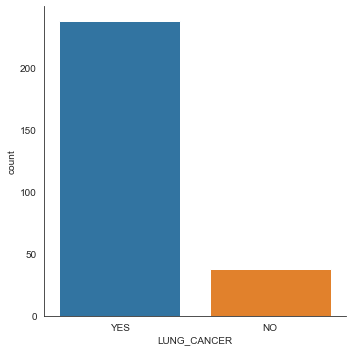

In [46]:
#let's visualize the lung_cancer column
sns.catplot(data=lc_df, x='LUNG_CANCER', kind='count')
sns.set_style('white')
plt.show();

Observation: Our target set is not balanced. We will have to fix the imbalance after splitting our dataset.

### Let's see if the risk of getting Lung_cancer is influnced by a patient's gender

In [47]:
#let's identify visualize lung cancer across genders
lc_df['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [48]:
lc_df['GENDER'].value_counts()

M    142
F    134
Name: GENDER, dtype: int64

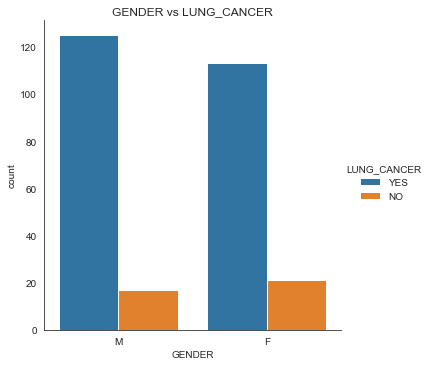

In [49]:
sns.catplot(data=lc_df, x='GENDER', hue='LUNG_CANCER', kind='count')
plt.title('GENDER vs LUNG_CANCER')
plt.show();

**Observation: From the graph above, we can say that gender has no serious correlation with Lung_cancer but might be influential in the presence of other factors**

### Let's see if alcohol consumption increases the risk of lung_cancer

In [50]:
lc_df['ALCOHOL CONSUMING'].unique()

array([1, 0], dtype=int64)

In [51]:
lc_df['ALCOHOL CONSUMING'].value_counts()

1    152
0    124
Name: ALCOHOL CONSUMING, dtype: int64

In [52]:
#show the impact of alcohol consumption on lung_cancer in a table
lc_df.groupby(['ALCOHOL CONSUMING', 'LUNG_CANCER']).agg(Total=('LUNG_CANCER', 'count'))

Total
ALCOHOL CONSUMING LUNG_CANCER       
0                 NO              31
                  YES             93
1                 NO               7
                  YES            145

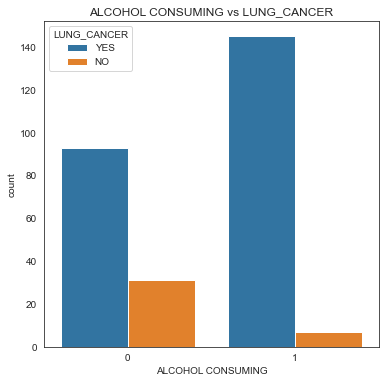

In [53]:
#let's visualize the relationship
plt.figure(figsize=(6,6))
sns.countplot(data=lc_df, x='ALCOHOL CONSUMING', hue='LUNG_CANCER')
plt.title('ALCOHOL CONSUMING vs LUNG_CANCER')
plt.show();

**Observation: From our graph above, alcohol consumption has a some level of observable influence on lung_cancer, however, it is possible that alcohol consumption together with other factors can directly result to lung_cancer**

### Let's analyse the relationship between age and lung_cancer:

In [54]:
print(f'Minimum Age: {lc_df["AGE"].min()}')
print(f'Maximum Age: {lc_df["AGE"].max()}')
print(f'Number of Age Variables: {lc_df["AGE"].nunique()}')

Minimum Age: 21
Maximum Age: 87
Number of Age Variables: 39


In [55]:
#cut ages values into fewer categories
ranges=[0, 21, 40, 50, 60, 70, 87]
group_names = ["20's", "40's", "50's", "60's", "70's", "80's"]
lc_df['AGE_GROUP'] = pd.cut(lc_df['AGE'], bins=ranges, labels=group_names)
lc_df['AGE_GROUP'].unique()

['70's', '80's', '60's', '50's', '20's', '40's']
Categories (6, object): ['20's' < '40's' < '50's' < '60's' < '70's' < '80's']

In [56]:
#display lung_cancer distribution across age_groups
lc_df.groupby(['AGE_GROUP', 'LUNG_CANCER']).agg(Total=('LUNG_CANCER', 'count'))

Total
AGE_GROUP LUNG_CANCER       
20's      NO               1
          YES              0
40's      NO               0
          YES              2
50's      NO               2
          YES              9
60's      NO              16
          YES             78
70's      NO              17
          YES             99
80's      NO               2
          YES             50

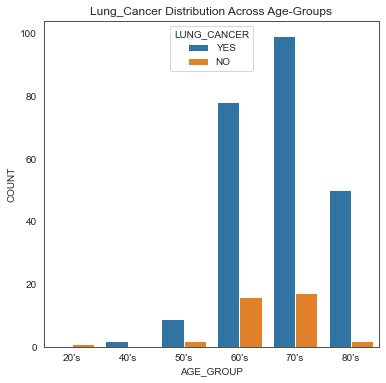

In [57]:
#visualize the distribution across the age_groups
plt.figure(figsize=(6,6))
sns.countplot(data=lc_df, x='AGE_GROUP', hue='LUNG_CANCER')
plt.xlabel('AGE_GROUP')
plt.ylabel('COUNT')
plt.title('Lung_Cancer Distribution Across Age-Groups')
plt.show();

**Observation: From the data availabel in our dataset, the graph above suggests that lunger_cancer is mostly distributed across the age bracket between 60's and 70's but this is not sacrosanct as other factors may be at play here**

### Let's analyse the relationship between smoking and lunger cancer:

In [58]:
lc_df['SMOKING'].unique()

array([0, 1], dtype=int64)

In [59]:
lc_df['SMOKING'].value_counts()

1    150
0    126
Name: SMOKING, dtype: int64

In [60]:
#display the impact of smoking on lung_cancer with a table
lc_df.groupby(['SMOKING', 'LUNG_CANCER']).agg(Total=('LUNG_CANCER', 'count'))

Total
SMOKING LUNG_CANCER       
0       NO              19
        YES            107
1       NO              19
        YES            131

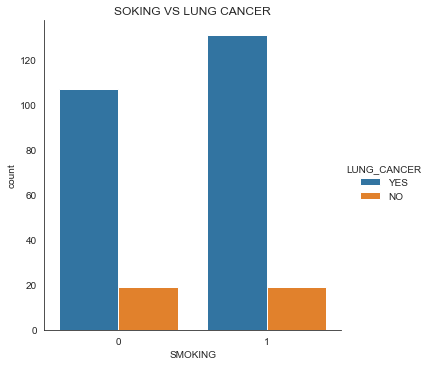

In [61]:
#visualize the distribution
sns.catplot(data=lc_df, x='SMOKING', hue='LUNG_CANCER', kind='count')
plt.title('SOKING VS LUNG CANCER')
plt.show()

**Observation: From our graph above, smoking has a very minor influence on lung_cancer, although not very noticeable, however, it is very possible that smoking together with other factors can directly result to lung_cancer**

## Preprocessing

In [62]:
lc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   GENDER                 276 non-null    object  
 1   AGE                    276 non-null    int64   
 2   SMOKING                276 non-null    int64   
 3   YELLOW_FINGERS         276 non-null    int64   
 4   ANXIETY                276 non-null    int64   
 5   PEER_PRESSURE          276 non-null    int64   
 6   CHRONIC DISEASE        276 non-null    int64   
 7   FATIGUE                276 non-null    int64   
 8   ALLERGY                276 non-null    int64   
 9   WHEEZING               276 non-null    int64   
 10  ALCOHOL CONSUMING      276 non-null    int64   
 11  COUGHING               276 non-null    int64   
 12  SHORTNESS OF BREATH    276 non-null    int64   
 13  SWALLOWING DIFFICULTY  276 non-null    int64   
 14  CHEST PAIN             276 non-null    int

#### Label Encoder:

In [63]:
#instantiate LabelEncoder
encoder = LabelEncoder()

columns = ['GENDER', 'LUNG_CANCER', 'AGE_GROUP']

for col in columns:
    lc_df[col] = encoder.fit_transform(lc_df[col])

In [64]:
lc_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AGE_GROUP
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1,4
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1,5
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0,3
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0,4
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0,4


In [65]:
lc_df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AGE_GROUP
279,0,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1,3
280,0,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0,3
281,1,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0,3
282,1,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0,2
283,1,60,0,1,1,0,0,1,0,1,1,1,1,1,1,1,3


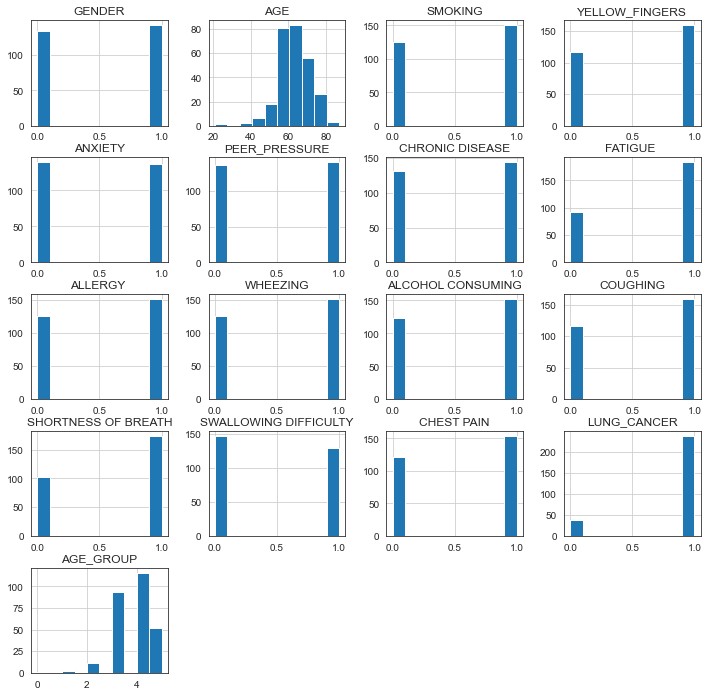

In [66]:
lc_df.hist();

## Building of The Model

In [67]:
#create the feature variable
X = lc_df.drop('LUNG_CANCER', axis=1)
X.shape

(276, 16)

In [68]:
#create target variable
y = lc_df['LUNG_CANCER']
y.shape

(276,)

### Partitioning:

In [69]:
#let's set a seed
SEED = 1

In [70]:
#let's partition our dataset into 80% train, and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=SEED)

In [71]:
y_train.value_counts()

1    167
0     26
Name: LUNG_CANCER, dtype: int64

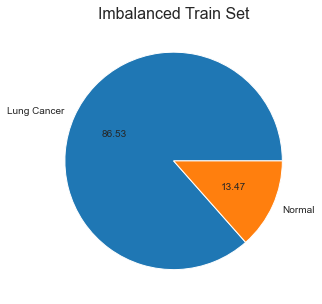

In [92]:
#visualize the imbalance in the train set
labels = ['Lung Cancer', 'Normal']
plt.figure(figsize=(5,5))
plt.pie(y_train.value_counts(), autopct='%.2f', labels=labels)
plt.title('Imbalanced Train Set', fontsize=16)
plt.show();

Observation: Our train set is clearly not balanced, and we need to resample it to be able to balance it.

### Resampling

In [76]:
#instantiate and employ RandomUnderSampler to correct the imbalance
rus = RandomUnderSampler(sampling_strategy=1)
rus_X_train, rus_y_train = rus.fit_resample(X_train, y_train)
rus_y_train.value_counts()

0    26
1    26
Name: LUNG_CANCER, dtype: int64

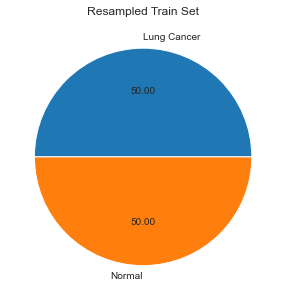

In [77]:
#visualize the resampled train set
labels = ['Lung Cancer', 'Normal']
plt.figure(figsize=(5,5))
plt.pie(rus_y_train.value_counts(), autopct='%.2f', labels=labels)
plt.title('Resampled Train Set')
plt.show();

Observation: Our train set is now balanced

### Hyperparameter Tuning For Our Classification Algorithms

In [83]:
#hyperparameter tuning for logistic regression
lr = LogisticRegression(random_state=SEED)
param_grid={
    'C': [0.01, 0.1, 1.0, 10, 100],
    'penalty': ['none', 'l1', 'l2', 'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

#perform grid search with cross-validation to obtain the best hyperparameters
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(rus_X_train, rus_y_train)

#print the best hyperparameters
print(grid_search.best_params_)

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}


In [88]:
#hyperparameter tuning for KNN
knn = KNN()
param_grid={
    'leaf_size': list(range(1, 20)),
    'n_neighbors': list(range(1, 10)),
    'p': [1, 2]
}

#perform grid search with cross-validation to obtain the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(rus_X_train, rus_y_train)

#print the best hyperparameters
print(grid_search.best_params_)

{'leaf_size': 1, 'n_neighbors': 5, 'p': 1}


In [94]:
#hyperparameter tuning for Decision Tree
dt = DecisionTreeClassifier(random_state=SEED)
param_grid = {
    'max_depth': [3,4,5,6,7,8],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2,3,4]
}

#perform grid search with cross-validation to obtain the best hyperparameters
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(rus_X_train, rus_y_train)

#print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


### Employing The Classification Algorithms(Logistic Regression, K-Nearest Neighbor, And Decision Tree Claassifier)

In [95]:
#instantiate the individual classifiers
lr = LogisticRegression(random_state=SEED, C=1.0, penalty='l2', solver='newton-cg')
knn = KNN(leaf_size=1, n_neighbors=5, p=1)
dt = DecisionTreeClassifier(random_state=SEED, max_depth=3, min_samples_leaf=4, min_samples_split=2)

In [96]:
#Define a list called classifier that contains the tuples(classifier_name, classifier)
classifiers = [
    ('Logistic Regression', lr),
    ('K-Nearest Neighbor', knn),
    ('Decision Tree Claassifier', dt)
    
]

In [97]:
#iterate over classifiers, a list of tuple containing the classification algorithms
for clf_name, clf in classifiers:
    #fit the classifier to the training set
    clf.fit(rus_X_train, rus_y_train)
    
    #predict the labels of the test set
    y_pred = clf.predict(X_test)
    
    #evaluate the accuracy of classifiers on test set
    print('{:s}:{:.3f}'.format(clf_name, accuracy_score( y_test, y_pred)))
    

Logistic Regression:0.819
K-Nearest Neighbor:0.687
Decision Tree Claassifier:0.639


**Observation: Logistic Regression with an accuracy of 81.9% performed better than K-Nearest Neighbor and Decision Tree Claassifier with accuracy of 68.7% and 63.9% respectively**

### Employing Voting Classifier

In [135]:
#hyperparameter tuning for voting classifier
vc = VotingClassifier(estimators=classifiers)
param_grid={
    'voting': ['hard', 'soft'],
    'weights': [(1,1,1), (2,1,1), (1,2,1), (1,1,2)]
}
#perform grid search with cross-validation to get the best hyperparameters 
grid = GridSearchCV(vc, param_grid, cv=5)
grid.fit(X_train, y_train)

#print the best hyperparameters
print(grid.best_params_)

{'voting': 'hard', 'weights': (2, 1, 1)}


In [136]:
#instantiate VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers, voting='hard', weights=(2, 1, 1))

In [137]:
#fit 'vc' to the training set and predict the test labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [139]:
#evaluate the accuracy of 'vc' on test set"
print('Voting Classifier:{:.3}'.format(accuracy_score(y_test, y_pred)))

Voting Classifier:0.867


### Conclusion: Voting Classifier, vc, with an accuracy score of approximately 86.7% turns out to be a better model having performed better than the individual classifiers by the virtue of the combination of these individual classifiers, thus, having them compliment each other.